In [2]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pathlib
import tikzplotlib
from collections import defaultdict


In [3]:
print(tikzplotlib.Flavors.latex.preamble())

\documentclass{standalone}
\usepackage[utf8]{inputenc}
\usepackage{pgfplots}
\DeclareUnicodeCharacter{2212}{−}
\usepgfplotslibrary{groupplots,dateplot}
\usetikzlibrary{patterns,shapes.arrows}
\pgfplotsset{compat=newest}



In [4]:
# mpl.use("pgf")
# mpl.rcParams.update({
    # "pgf.texsystem": "pdflatex",
    # 'font.family': 'serif',
    # 'text.usetex': True,
    # 'pgf.rcfonts': False,
# })

In [5]:
def read_jsons():

    data = defaultdict(lambda: [])
    # Read jsons files of build/semana03/circles with pathlib
    jsons = list(pathlib.Path("../build/semana03/circles").glob("*.json"))
    jsons.sort()
    print(jsons)
    
    for json_file in jsons:
        with open(json_file, "r") as f:
            json_values = json.load(f)
            for key in ["n", "time", "h", "algorithm"]:
                data[key].append(json_values[key])

    
    # Change values n3 to $O(n^3)$ on algorithm column
    data["algorithm"] = ["segments" if x == "n3" else x for x in data["algorithm"]]

    

    return pd.DataFrame(data)



In [6]:
df = read_jsons()

[PosixPath('../build/semana03/circles/random_1000000_1.json'), PosixPath('../build/semana03/circles/random_1000000_2.json'), PosixPath('../build/semana03/circles/random_1000000_3.json'), PosixPath('../build/semana03/circles/random_1000000_4.json'), PosixPath('../build/semana03/circles/random_1000000_5.json'), PosixPath('../build/semana03/circles/random_100000_1.json'), PosixPath('../build/semana03/circles/random_100000_2.json'), PosixPath('../build/semana03/circles/random_100000_3.json'), PosixPath('../build/semana03/circles/random_100000_4.json'), PosixPath('../build/semana03/circles/random_100000_5.json'), PosixPath('../build/semana03/circles/random_10000_1.json'), PosixPath('../build/semana03/circles/random_10000_2.json'), PosixPath('../build/semana03/circles/random_10000_3.json'), PosixPath('../build/semana03/circles/random_10000_4.json'), PosixPath('../build/semana03/circles/random_10000_5.json'), PosixPath('../build/semana03/circles/random_1000_1.json'), PosixPath('../build/seman

[PosixPath('../build/semana03/circles/random_1000000_1.json'), PosixPath('../build/semana03/circles/random_1000000_2.json'), PosixPath('../build/semana03/circles/random_1000000_3.json'), PosixPath('../build/semana03/circles/random_1000000_4.json'), PosixPath('../build/semana03/circles/random_1000000_5.json'), PosixPath('../build/semana03/circles/random_100000_1.json'), PosixPath('../build/semana03/circles/random_100000_2.json'), PosixPath('../build/semana03/circles/random_100000_3.json'), PosixPath('../build/semana03/circles/random_100000_4.json'), PosixPath('../build/semana03/circles/random_100000_5.json'), PosixPath('../build/semana03/circles/random_10000_1.json'), PosixPath('../build/semana03/circles/random_10000_2.json'), PosixPath('../build/semana03/circles/random_10000_3.json'), PosixPath('../build/semana03/circles/random_10000_4.json'), PosixPath('../build/semana03/circles/random_10000_5.json'), PosixPath('../build/semana03/circles/random_1000_1.json'), PosixPath('../build/seman

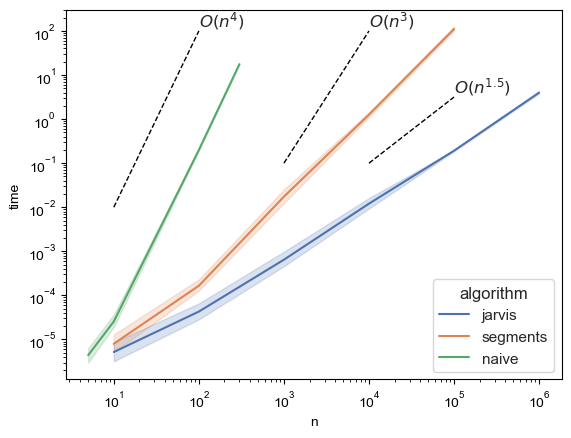

In [7]:
fig, ax = plt.subplots(1, 1)
sns.set_theme(style="whitegrid")
sns.lineplot(data=read_jsons(), x="n", y="time", hue="algorithm", ax=ax)
ax.set(xscale="log", yscale="log")

# Plot y = nˆ4
xs = [10, 100]; ys = [1e-2, 1e2]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^4)$", fontsize=12, verticalalignment="bottom")

xs = [1000, 10000]; ys = [1e-1, 1e2]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^3)$", fontsize=12, verticalalignment="bottom")

# xs = [10000, 100000]; ys = [1e-1, 1e+1]
# ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
# ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

xs = [10000, 100000]; ys = [1e-1, math.pow(10, -1+1.5)]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{1.5})$", fontsize=12, verticalalignment="bottom")
plt.savefig("tex/figures/circles_time.png")
plt.show()

# Para apresentação

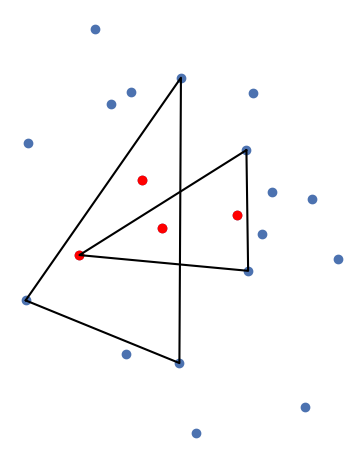

In [12]:
random_points = np.loadtxt("./tex/tables/random_points.csv", delimiter=",")
fig, ax = plt.subplots(1, 1)
ax.scatter(random_points[:, 0], random_points[:, 1])

# Write index points
# for i, point in enumerate(random_points):
    # ax.text(point[0], point[1], i, fontsize=10, verticalalignment="bottom")
    

# Equal aspect ratio
ax.set_aspect("equal")

## Remove grid and axis
ax.grid(False)
ax.axis("off")

plt.savefig("tex/figures/algs/naive_0.png")
tikzplotlib.save("tex/figures/algs/naive_0.tex")

triangs = [5, 16, 20, 5]
xt = random_points[triangs, 0]
yt = random_points[triangs, 1]

ax.plot(xt, yt, color="black")
plt.savefig("tex/figures/algs/naive_1.png")
tikzplotlib.save("tex/figures/algs/naive_1.tex")

ax.scatter(random_points[[7,19], 0], random_points[[7,19], 1], color="red")
plt.savefig("tex/figures/algs/naive_2.png")
tikzplotlib.save("tex/figures/algs/naive_2.tex")

triangs = [11, 17, 18, 11]
xt = random_points[triangs, 0]
yt = random_points[triangs, 1]
ax.plot(xt, yt, color="black")
plt.savefig("tex/figures/algs/naive_3.png")
tikzplotlib.save("tex/figures/algs/naive_3.tex")

ax.scatter(random_points[[6,16], 0], random_points[[6,16], 1], color="red")
plt.savefig("tex/figures/algs/naive_4.png")
tikzplotlib.save("tex/figures/algs/naive_4.tex")


plt.tight_layout()
plt.show()

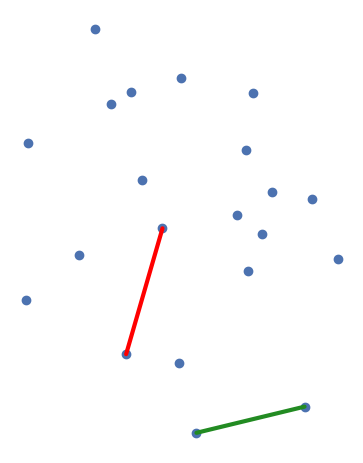

In [13]:
random_points = np.loadtxt("./tex/tables/random_points.csv", delimiter=",")
fig, ax = plt.subplots(1, 1)
ax.scatter(random_points[:, 0], random_points[:, 1])
xm, ym = np.min(random_points, axis=0)
ax.scatter([xm], [ym], color="white")


# Equal aspect ratio
ax.set_aspect("equal")

## Remove grid and axis
ax.grid(False)
ax.axis("off")

plt.savefig("tex/figures/algs/segments_0.png")
tikzplotlib.save("tex/figures/algs/segments_0.tex")

ax.plot(random_points[[8, 14], 0], random_points[[8, 14], 1], color="ForestGreen", lw=3)
ax.plot(random_points[[0,19], 0], random_points[[0,19], 1], color="red", lw=3)
plt.savefig("tex/figures/algs/segments_1.png")
tikzplotlib.save("tex/figures/algs/segments_1.tex")

plt.tight_layout()
plt.show()

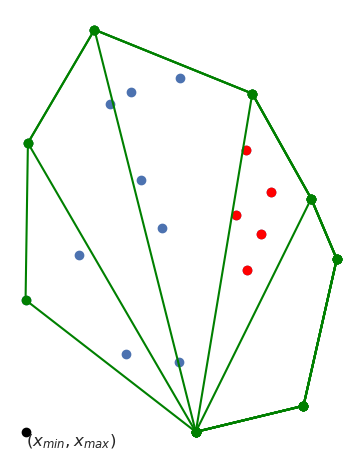

In [25]:
random_points = np.loadtxt("./tex/tables/random_points.csv", delimiter=",")
fig, ax = plt.subplots(1, 1)
ax.scatter(random_points[:, 0], random_points[:, 1])
xm, ym = np.min(random_points, axis=0)
ax.scatter([xm], [ym], color="white")

# Equal aspect ratio
ax.set_aspect("equal")

## Remove grid and axis
ax.grid(False)
ax.axis("off")

plt.savefig("tex/figures/algs/jarvis_0.png")
tikzplotlib.save("tex/figures/algs/jarvis_0.tex")

xm, ym = np.min(random_points, axis=0)
ax.scatter([xm], [ym], color="black")
ax.text(xm, ym, "$(x_{min}, x_{max})$", fontsize=12, verticalalignment="top")


plt.savefig("tex/figures/algs/jarvis_1.png")
tikzplotlib.save("tex/figures/algs/jarvis_1.tex")

tops = [8, 14, 9, 10, 13, 4, 1, 11, 8]

ax.scatter(random_points[tops[:1], 0], random_points[tops[:1], 1], color="green")
plt.savefig("tex/figures/algs/jarvis_2.png")

tikzplotlib.save("tex/figures/algs/jarvis_2.tex")

for i in range(1, len(tops)):
    ax.scatter(random_points[tops[:i], 0], random_points[tops[:i], 1], color="green")
    ax.plot(random_points[tops[:i], 0], random_points[tops[:i], 1], color="green")
    ps = random_points[[tops[0], tops[i-1]], :]
    if i > 3:
        ax.plot(ps[:, 0], ps[:, 1], color="green")
        
        
    if i == 5:
        ps = [2, 5, 7, 12, 20]
        ps = random_points[ps, :]
        ax.scatter(ps[:, 0], ps[:, 1], color="red")
    plt.savefig(f"tex/figures/algs/jarvis_{i+2}.png")
    tikzplotlib.save(f"tex/figures/algs/jarvis_{i+2}.tex")

plt.tight_layout()
plt.show()
plt.close()